In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Metrics

## Confusion matrix

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
iris = load_iris()
cancer = load_breast_cancer()

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


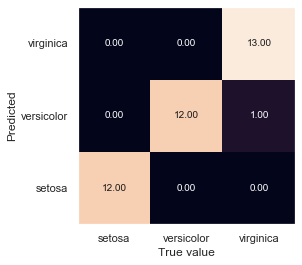

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 6)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
mglearn.tools.heatmap(matrix.T, xlabel = 'True value', ylabel = 'Predicted', xticklabels = iris.target_names, yticklabels = iris.target_names)


# Precision, recall, f1-score

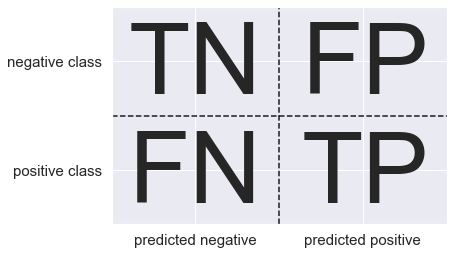

In [26]:
mglearn.plots.plot_binary_confusion_matrix()

### Precision

Precison = $\frac{TP}{TP + FP}$
<p class = 'tag'>The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative</p>
Precision is used as a performance metric when the goal is to limit the number of
false positives. As an example, imagine a model for predicting whether a new drug
will be effective in treating a disease in clinical trials. Clinical trials are notoriously
expensive, and a pharmaceutical company will only want to run an experiment if it is
very sure that the drug will actually work. Therefore, it is important that the model
does not produce many false positives—in other words, that it has a high precision.
Precision is also known as positive predictive value (PPV).

### Recall

Recall = $\frac{TP}{TP + FN}$
<p class = 'tag'>The recall is
intuitively the ability of the classifier to find all the positive samples</p>
<span class = 'note'>Recall is used as performance metric when we need to identify all positive samples</span>;
<br>
<span class = 'highlight'>E.g: identify people who have cancer diseases</span>
<br>
that is, when it is important to avoid false negatives. The cancer diagnosis example
from earlier in this chapter is a good example for this: it is important to find all peo‐
ple that are sick, possibly including healthy patients in the prediction. Other names
for recall are sensitivity, hit rate, or true positive rate (TPR).
There is a trade-off between optimizing recall and optimizing precision. You 

### F1 score

F = 2$\frac{precision.recall}{precision + recall}$

It takes precision and recall
into account, it can be a better measure than accuracy on <b>imbalanced binary classification datasets</b>.

In [18]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
X, y = StandardScaler().fit_transform(cancer.data), cancer.target
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 6)
def report(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))


In [23]:
report(LogisticRegression())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.98      0.98      0.98        58

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
report(SVC())

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.95      1.00      0.97        58

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Precision-recall curve

1


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([-9.61921983e-03,  4.72024823e-01,  7.71248864e-01,  1.74528430e+00,
        1.75855412e+00,  1.75885220e+00,  2.20506587e+00,  2.20597050e+00,
        2.56773189e+00,  2.57341373e+00,  2.86356099e+00,  2.93153782e+00,
        3.09628248e+00,  3.13061595e+00,  3.16784913e+00,  3.31369780e+00,
        3.65184784e+00,  3.70930099e+00,  3.73541111e+00,  3.74975186e+00,
        3.78303950e+00,  4.08956873e+00,  4.13525838e+00,  4.18574512e+00,
        4.21048441e+00,  4.28050649e+00,  4.52508621e+00,  4.71037699e+00,
        4.77907089e+00,  5.04068668e+00,  5.06625189e+00,  5.19686616e+00,
        5.19895201e+00,  5.21685377e+00,  5.29387625e+00,  6.45259963e+00,
        6.45626304e+00,  6.57737325e+00,  6.73886782e+00,  6.80218706e+00,
        7.27921662e+00,  7.29636195e+00,  7.76134398e+00,  7.76220556e+00,
        8.03630065e+00,  8.05713335e+00,  8.06552678e+00,  8.11042033e+00,
        8.18446969e+00,  8.58140039e+00,  8.71602263e+00,  9.47114015e+00,
        9.66376487e+00,  

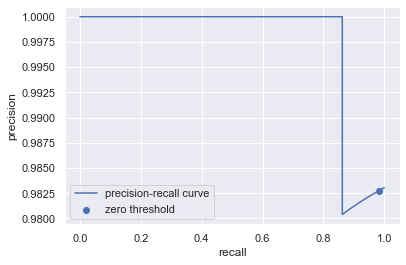

In [42]:
from sklearn.metrics import precision_recall_curve
model = LogisticRegression()
model.fit(x_train, y_train)
#How this work?
#First we compute the decision function on the test set
#then the precision_recall_curve will try different values for THRESHOLD
#for each THRESHOLD, we will get Y_PRED for the test set
#then we compute PRECISION and RECALL from Y_TEST and Y_PREDICT
precision, recall, threshold = precision_recall_curve(y_test, model.decision_function(x_test))

zero_index = np.searchsorted(threshold, 0)
plt.plot(recall, precision, label = 'precision-recall curve')
plt.scatter(recall[zero_index], precision[zero_index], label = 'zero threshold')
plt.xlabel('recall')
plt.ylabel('precision')
print(zero_index)
plt.legend()
threshold

<p class = 'note'>Each point along the curve in Figure 5-13 corresponds to a possible threshold of the
decision_function
<br>
The closer a curve stays to the upper-right corner, the better the classifier. A point at
the upper right means high precision and high recall for the same threshold. 
</p>

### <h3>Summarize the precision-recall curve

<p>
t. One particular way to summarize the precision-recall curve is
by computing the integral or area under the curve of the precision-recall curve, also
known as the <b>average precision</b>.
4
    You can use the <code>average_precision_score</code> function
to compute the average precision. Because we need to compute the ROC curve and
    consider multiple thresholds, the result of <code>decision_function</code> or <code>predict_proba</code>
    needs to be passed to <code>average_precision_score</code>, not the result of predict:
</p>

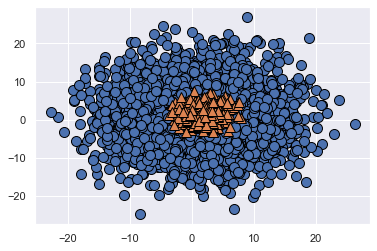

In [48]:
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=(4000, 500), centers=[[1, 1], [2,2]], cluster_std=[7.0, 2],
 random_state=22)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [49]:
svm = SVC().fit(x_train, y_train)
logreg = LogisticRegression().fit(x_train, y_train)
svm_score = average_precision_score(y_test, svm.decision_function(x_test))
log_score = average_precision_score(y_test, logreg.decision_function(x_test))
print('SVM Average precision score: %.2f' % svm_score)
print('Logistic Average precision score: %.2f' % log_score)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVM Average precision score: 0.48
Logistic Average precision score: 0.13


<p class = 'note'>From the above information, we can see that SVM performances much more better than Logistic Regression on this dataset</p>

For more detail and insight, we can plot 2 precision-recall curve for SVM and LogisticRegression respectively:

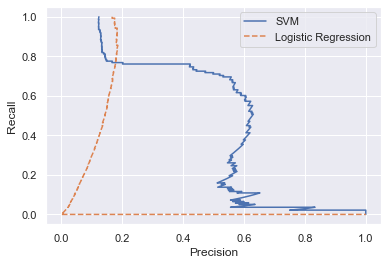

In [51]:
def plot_prc(model,label, ls = '-'):
    precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(x_test))
    plt.plot(precision, recall, label = label, ls = ls)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
plot_prc(svm, 'SVM')
plot_prc(logreg, 'Logistic Regression', '--')
plt.legend()

## Receiver operating characteristics (ROC) and AUC

### ROC

<p class = 'highlight'>it shows the <u>false positive rate</u> (FPR) against the <u>true positive rate</u> (TPR).</p>


<span style='fontsize: 24px'>$TPR(Recall) = \frac{TP}{TP + FN}$</span>

The ROC curve can be computed using the <span class = 'tag'>roc_curve</span> function 

In [54]:
from sklearn.metrics import roc_curve

In [55]:
def plot_roc_curve(model):
    fpr, tpf, thresholds = roc_curve(y_test, model.decision_function(x_test))
    plt.plot(fpr, tpf)
    plt.xlabel('FPR = 1 - TPR')
    plt.ylabel('TPR (Recall)')


Text(0.5, 1.0, 'Logistic Regression')

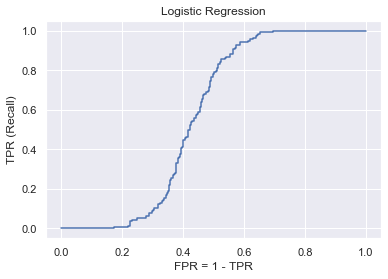

In [57]:
plot_roc_curve(logreg)
plt.title('Logistic Regression')

Text(0.5, 1.0, 'SVM')

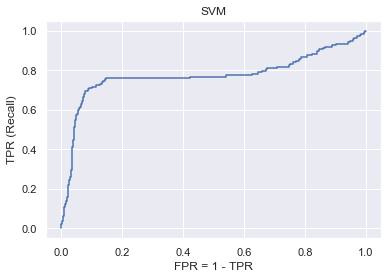

In [58]:
plot_roc_curve(svm)
plt.title('SVM')

<p class = 'highlight'>
For the ROC curve, the ideal curve is close to the top left: you want a classifier that
produces a high recall while keeping a low false positive rate.
</p>

### AUC: Summarizing ROC 

<p>We can compute the area under the ROC curve using the <span class = 'tag'>roc_auc_score</span> function</p>

In [59]:
from sklearn.metrics import roc_auc_score
svm_auc = roc_auc_score(y_test, svm.decision_function(x_test))
log_auc = roc_auc_score(y_test, logreg.decision_function(x_test))
print('SVM AUC score: %.2f' % svm_auc)
print('Logistic AUC score: %.2f' % log_auc)

SVM AUC score: 0.77
Logistic AUC score: 0.57


<p class = 'warning'> For classification problems with imbalanced classes, using AUC for model
selection is often much more meaningful than using accuracy.
</p>

## Multiclass

<p class = 'note'>The most commonly used metric for imbalanced datasets in the multiclass setting is
the multiclass version of the f-score</p>

Then, these per-class f-scores are averaged
using one of the following strategies:
<ul>
<li>"macro" averaging computes the unweighted per-class f-scores. This gives equal
    weight to all classes, no matter what their size is.</li>
<li> "weighted" averaging computes the mean of the per-class f-scores, weighted by
    their support. This is what is reported in the classification report.</li>
<li>"micro" averaging computes the total number of false positives, false negatives,
and true positives over all classes, and then computes precision, recall, and fscore using these counts.</li>


In [63]:
from sklearn.metrics import f1_score
y_pred = svm.predict(x_test)
f1_score(y_test, y_pred, average = 'micro')

0.8933333333333333

In [64]:
f1_score(y_test, y_pred, average = 'macro')

0.7048690055615796

<p class = 'highlight'>If you care about each sample equally much, it is recommended to use the "micro"
average f1
-score; if you care about each class equally much, it is recommended to use
the "macro" average f1
-score</p>

# Model selection by using Evaluation metrics

<b>Problem:</b><br>
By default, grid search choses the best model by using accuracy_score, how do we can use other criterias, like based on <code>AUC</code>?

<p class = 'highlight'>Solution:  Changing the score from the default (accuracy) to AUC can be done by providing "roc_auc" as the scoring parameter:</p>

In [70]:
from sklearn.model_selection import GridSearchCV
X, y = cancer.data, cancer.target

grid_param = {'C' : [.01, .1, 1, 10, 100], 'gamma' : [.001, .01, .1, 1, 10]}
grid = GridSearchCV(SVC(), grid_param, scoring = 'roc_auc', cv = 5)
grid.fit(X, y)
print('Best AUC score: %.2f' % grid.best_score_)

Best AUC score: 0.96


<h3>Cross-validation by using Evaluation metrics</h3>

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter = 10000), X, y, cv = 5, scoring = 'average_precision')
scores

array([0.99606064, 0.99633239, 0.99890251, 0.98633678, 0.99861043])

<h3>Available options for the <i>keyword</i>: <code>scoring</code></h3>

In [76]:
from sklearn.metrics.scorer import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])